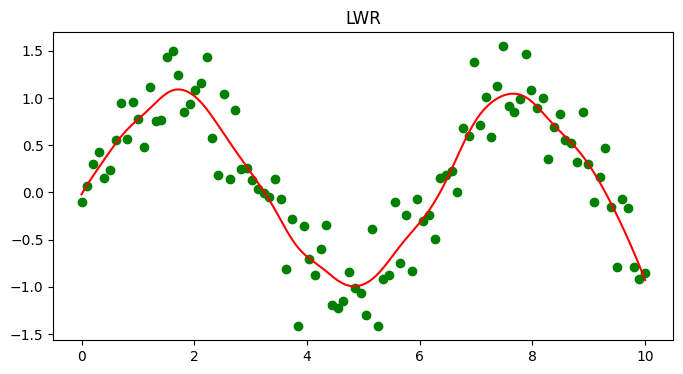

In [12]:
#9.py
import matplotlib.pyplot as plt
import numpy as np
def lwr(x,y,x0,tau=0.3):
    m=len(x)
    X=np.c_[np.ones(m),x]
    X0=np.array([1,x0])
    w=np.exp(-((x-x0)**2)/(2*tau**2))
    W=np.diag(w)
    thetha=np.linalg.pinv(X.T@W@X)@X.T@W@y
    return X0@thetha
x=np.linspace(0,10,100)
y=np.sin(x)+0.3*np.random.randn(100)
x_t=np.linspace(0,10,300)
y_t=np.array([lwr(x,y,x0,tau=0.3) for x0 in x_t])

plt.figure(figsize=(8,4))
plt.scatter(x,y,label="X",color="green")
plt.plot(x_t,y_t,color="red")
plt.title("LWR")
plt.show()

In [13]:
#8.py
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris=load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
knn=KNeighborsClassifier().fit(x_train,y_train)
print(f"feature names={iris.feature_names}")
print(f"target_names={iris.target}")
print(f"testing data={y_test}")
y_pred=knn.predict(x_test)
print(f"predicted data={y_pred}")
print(f"confusion matrix={confusion_matrix(y_test,y_pred)}")
print(f"accuracy score={accuracy_score(y_test,y_pred)}")
print(f"classification report={classification_report(y_test,y_pred,target_names=iris.target_names)}")
print(f"number of misclassified={sum(p!=t for p,t in zip(y_test,y_pred))}")

feature names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
testing data=[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
predicted data=[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
confusion matrix=[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
accuracy score=1.0
classification report=              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.

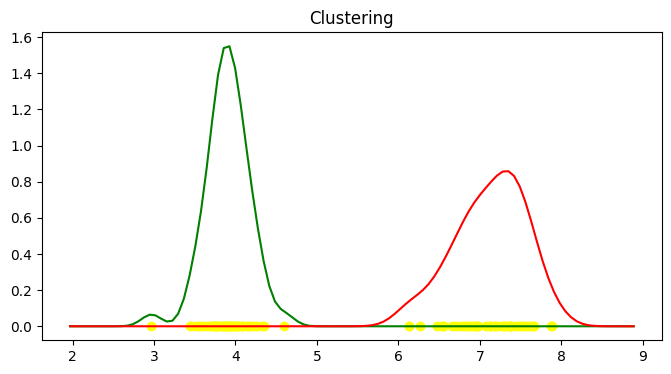

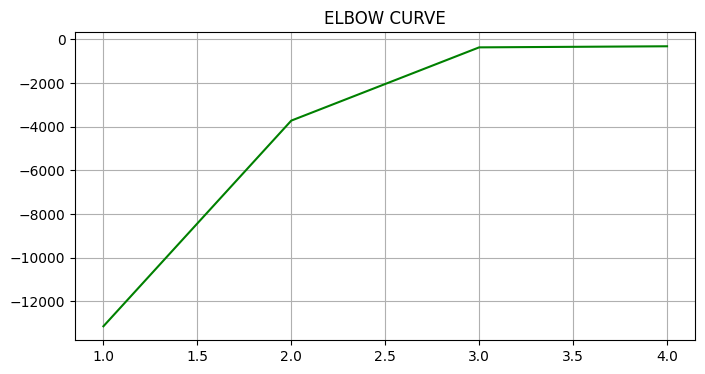

In [3]:
#7.py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

data=np.concatenate([
    np.random.normal(4,0.3,50),
    np.random.normal(7,0.4,50)])

kde1=gaussian_kde(data[:50])
kde2=gaussian_kde(data[50:])
x_vals=np.linspace(min(data)-1,max(data)+1,100)
plt.figure(figsize=(8,4))
plt.plot(x_vals,kde1(x_vals),color="green")
plt.plot(x_vals,kde2(x_vals),color="red")
plt.scatter(data,np.zeros_like(data),color="yellow")
plt.title("Clustering")
plt.show()

X,_=make_blobs(n_samples=200,centers=3,n_features=2,random_state=42)
scores=[]
K=range(1,5)
for k in K:
    knn=KMeans(n_clusters=k,n_init=10,max_iter=100,random_state=42)
    knn.fit(X)
    scores.append(-knn.inertia_)
plt.figure(figsize=(8,4))
plt.grid()
plt.plot(K,scores,color="green")
plt.title("ELBOW CURVE")
plt.show()
    

In [56]:
#6.py
import bayespy as bp
import numpy as np
import csv
enums=[
    {"supersenior":0,"senior":1,"adult":2,"teen":3,"child":4},
    {"male":0,"female":1},
    {"high":0,"medium":1,"low":2},
    {"yes":0,"no":1}]

filename="training.csv"
with open(filename,"r") as f:
    reader=csv.reader(f)
    data=np.array([[enums[i][v.lower()] for i,v in enumerate(row)] for row in reader])
N=len(data)
nodes=[]
for i,size in enumerate([5,2,3]):
    h=bp.nodes.Dirichlet(np.ones(size))
    p=bp.nodes.Categorical(h,plates=(N,))
    p.observe(data[:,i])
    nodes.append(p)

h_d=bp.nodes.Dirichlet(2*np.ones(2),plates=(5,2,3))
p_d=bp.nodes.MultiMixture(nodes,bp.nodes.Categorical,h_d)
p_d.observe(data[:,3])
h_d.update()

while True:
    Age=input("enter whether supersenior/senior/adult/teen/child:")
    sex=input("enter male/female")
    cholestrol=input("Enter cholestrol level :high/medium/low:")
    e=[enums[0][Age],enums[1][sex],enums[2][cholestrol]]
    prob=h_d.get_moments()[0][tuple(e)]
    prob=prob/np.sum(prob)
    print(f"probability (no/yes):{prob}")
    if input("try again yes/no").lower()!="yes":break

KeyError: 'sunny'

In [22]:
#5.py
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import csv
data=[
    ["ham","Hi,How are you?"],
    ["spam","Hurry up,sales end soon!!"],
    ["ham","How is your health?"],
    ["spam","Alert!! ending soon"],
    ["ham","the movie was good"],
    ["spam","Bank wants your details"]]

df=pd.DataFrame(data,columns=["label","text"])
df.to_csv("training.csv",index=False)
df['label']=df['label'].map({"ham":0,"spam":1})
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'],test_size=0.25,random_state=42)
vec=CountVectorizer()
x_train_vec=vec.fit_transform(x_train)
x_test_vec=vec.transform(x_test)

model=MultinomialNB()
model.fit(x_train_vec,y_train)
print(f"accuracy_score={model.score(x_test_vec,y_test)}")
msgs=["hi,how was the movie?","Hurry , bank is waiting"]
for m,p in zip(msgs,model.predict(vec.transform(msgs))):
    print(f"{m}->",['ham','spam'][p])
    


accuracy_score=1.0
hi,how was the movie?-> ham
Hurry , bank is waiting-> spam


In [31]:
#4.py
import  math
import numpy as np
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sd(x):
    return x*(1-x)
w1=np.random.randn(2,2)
b1=np.random.randn(1,2)
w2=np.random.randn(2,1)
b2=np.random.randn(1,1)

lr,epochs=0.5,10000
for epoch in range(1,epochs+1):
    h=sigmoid(np.dot(x,w1)+b1)
    o=sigmoid(np.dot(h,w2)+b2)
    e=y-o
    b_out=e*sd(o)
    b_h=np.dot(b_out,w2.T)*sd(h)
    w2+=np.dot(h.T,b_out)*lr
    b2+=np.sum(b_out,axis=0,keepdims=True)*lr
    w1+=np.dot(x.T,b_h)*lr
    b1+=np.sum(b_h,axis=0,keepdims=True)*lr
    if epoch==1 or epoch%1000==0:
        loss=np.mean(e**2)
        print("hidden layer output is ",h)
        print("output layer output is ",o)
        print(f"loss is {loss}")
        print(f"eroor is {e}")

d_in=sigmoid(np.dot(x,w1)+b1)
d_out=sigmoid(np.dot(d_in,w2)+b2)
print(f"predicted ouput is {np.round(d_out)}")

hidden layer output is  [[0.63936989 0.27665551]
 [0.69925032 0.28290061]
 [0.72016386 0.47660204]
 [0.77142493 0.48433848]]
output layer output is  [[0.14529394]
 [0.14523532]
 [0.13877595]
 [0.13864885]]
loss is 0.3781658391725251
eroor is [[-0.14529394]
 [ 0.85476468]
 [ 0.86122405]
 [-0.13864885]]
hidden layer output is  [[0.13328491 0.008642  ]
 [0.95802794 0.16427271]
 [0.95960821 0.16542503]
 [0.99971649 0.81716588]]
output layer output is  [[0.11691395]
 [0.88133404]
 [0.88157637]
 [0.13386506]]
loss is 0.014923623459248596
eroor is [[-0.11691395]
 [ 0.11866596]
 [ 0.11842363]
 [-0.13386506]]
hidden layer output is  [[0.08563866 0.00253195]
 [0.9635372  0.11096752]
 [0.96425801 0.11147126]
 [0.99986864 0.86051039]]
output layer output is  [[0.05455502]
 [0.95025002]
 [0.95031543]
 [0.05306705]]
loss is 0.0026839948656286654
eroor is [[-0.05455502]
 [ 0.04974998]
 [ 0.04968457]
 [-0.05306705]]
hidden layer output is  [[0.07453044 0.00171182]
 [0.96603007 0.09795525]
 [0.96656306

In [69]:
#3.py
import csv,math

    
with open("training.csv","r") as f:
    reader=csv.reader(f)
    header=next(reader)
    data=[r for r in reader]
t=len(header)-1
def entropy(rows):
    en=0
    labels=[row[t] for row in rows]
    total=len(labels)
    for label in set(labels):
        p=labels.count(label)/total
        en-=p*math.log2(p)
    return en
def info_gain(rows,col):
    total=entropy(rows)
    w=0
    values=set(r[col] for r in rows)
    for v in values:
        subset=[r for r in rows if r[col]==v]
        w+=entropy(subset)*(len(subset)/len(rows))
    return total-w

def idtree(rows,cols):
    labels=[r[t] for r in rows]
    if labels.count(labels[0])==len(labels):
        return labels[0]
    best=max(cols,key=lambda c: info_gain(rows,c))
    return {header[best]: {v: idtree([r for r in rows if r[best]==v],[c for c in cols if c!=best]) for v in set(r[best] for r in rows)}}

tree=idtree(data,list(range(len(header)-1)))
def classify(tree,sample):
    if not isinstance(tree,dict):return tree
    atrr=next(iter(tree))
    s=sample[atrr]
    if s not in tree[atrr]:
        return "UNKNOWN"
    return classify(tree[atrr][s],sample)
print(tree)
# Test
sample = {
    'Outlook': 'Rainy',
    'Temperature': 'Warm',
    'Humidity': 'High',
    'Wind': 'Strong',
    'Water': 'Warm',
    'Forecast': 'Change'
}
print("Prediction:", classify(tree, sample))
    
        


{'Outlook': {'Overcast': 'Yes', 'Rainy': 'No', 'Sunny': {'Humidity': {'High': {'Water': {'Warm': 'No', 'Cool': 'Yes'}}, 'Normal': 'Yes'}}}}
Prediction: No


In [35]:
#2.py
import csv
def read_csv(filename):
    concept=[]
    target=[]
    with open(filename,"r") as f:
        reader=csv.reader(f)
        for row in reader:
            concept.append(row[:-1])
            target.append(row[-1])
    return concept,target

def CE(concept,target):
    step=0
    sh=concept[0].copy()
    gh=[["?" for _ in range(len(sh))]]
    print(f"initial specific hypothesis is {sh}")
    print(f"initial general hypothesis is {gh}")
    for i,instance in enumerate(concept):
        if target[i].lower()=="yes":
            for j in range(len(sh)):
                if sh[j]!=instance[j]:
                    sh[j]="?"
            gh=[g for g in gh if all(g[j]=="?" or g[j]==sh[j] for j in range(len(sh)))]
        else:
            ng=[]
            for g in gh:
                for j in range(len(sh)):
                    if g[j]=="?":
                        if sh[j]!="?" and sh[j]!=instance[j]:
                            h=g.copy()
                            h[j]=sh[j]
                            if h not in ng:
                                ng.append(h)
            gh=ng
        step+=1
        print(f" step {step} :specific hypothesis is {sh}\ngeneral hypothesis is {gh}\n")
    print(f"final specific hypothesis is {sh}\ngeneral hypothesis is {gh}\n")

concept,target=read_csv("training.csv")
CE(concept,target)
            

initial specific hypothesis is ['Sunny', 'Warm', 'High', 'Yes']
initial general hypothesis is [['?', '?', '?', '?']]
 step 1 :specific hypothesis is ['Sunny', 'Warm', 'High', 'Yes']
general hypothesis is [['?', '?', '?', '?']]

 step 2 :specific hypothesis is ['Sunny', '?', 'High', 'Yes']
general hypothesis is [['?', '?', '?', '?']]

 step 3 :specific hypothesis is ['Sunny', '?', 'High', 'Yes']
general hypothesis is [['Sunny', '?', '?', '?'], ['?', '?', 'High', '?']]

 step 4 :specific hypothesis is ['Sunny', '?', 'High', '?']
general hypothesis is [['Sunny', '?', '?', '?'], ['?', '?', 'High', '?']]

final specific hypothesis is ['Sunny', '?', 'High', '?']
general hypothesis is [['Sunny', '?', '?', '?'], ['?', '?', 'High', '?']]



In [54]:
#1.py
def read_csv(filename):
    data=[]
    with open(filename,"r") as f:
        for line in f:
            row=line.strip().split(",")
            data.append(row)
    return data

def FS(data):
    hypo=None
    step=1
    target=len(data[0])-1
    for row in data:
        if row[target]=="Yes":
            if hypo==None:
                hypo=row[:target].copy()
            else:
                for j in range(len(hypo)):
                    if hypo[j]!=row[j]:
                        hypo[j]="?"
            print(f"hypothesis is {hypo}\n")
            step+=1
        else:
            print("skipping negative example")
    print(f"Final hypothesis is {hypo}")

data=read_csv("training.csv")
FS(data)

hypothesis is ['Sunny', 'Warm', 'High', 'Strong']

hypothesis is ['Sunny', 'Warm', 'High', '?']

skipping negative example
hypothesis is ['Sunny', '?', 'High', '?']

skipping negative example
Final hypothesis is ['Sunny', '?', 'High', '?']
